In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter,OrderedDict
import calendar as cld
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/DSV_CSV_Files/StudentsPerformance.xls")
dfInitial = pd.read_csv("/content/drive/MyDrive/DSV_CSV_Files/StudentsPerformance.xls")

In [ ]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [ ]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
df["parental level of education"].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [ ]:
df["parental level of education"] = df["parental level of education"].map(
    {"master's degree":5,
     "bachelor's degree":4,
     "associate's degree":3,
     'some college':2,
     'high school':1,
     'some high school':0
    })
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,4,standard,none,72,72,74
1,female,group C,2,standard,completed,69,90,88
2,female,group B,5,standard,none,90,95,93
3,male,group A,3,free/reduced,none,47,57,44
4,male,group C,2,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,5,standard,completed,88,99,95
996,male,group C,1,free/reduced,none,62,55,55
997,female,group C,1,free/reduced,completed,59,71,65
998,female,group D,2,standard,completed,68,78,77


In [ ]:
# df['gender'] = df['gender'].map({
#     'female' : 1,
#     'male' : 2
# })

# df["race/ethnicity"] = df["race/ethnicity"].map({
#     'group B':2, 'group C':3, 'group A':1, 'group D':4, 'group E':5
# })

# df["lunch"] = df["lunch"].map({'standard':1, 'free/reduced':0})

from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

df['gender']= label_encoder.fit_transform(df['gender'])
df['race/ethnicity']= label_encoder.fit_transform(df['race/ethnicity'])
df['lunch']= label_encoder.fit_transform(df['lunch'])
df["test preparation course"]= label_encoder.fit_transform(df["test preparation course"])

In [ ]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,4,1,1,72,72,74
1,0,2,2,1,0,69,90,88
2,0,1,5,1,1,90,95,93
3,1,0,3,0,1,47,57,44
4,1,2,2,1,1,76,78,75


In [ ]:
df["total score"] = df["math score"] + df["reading score"] + df["writing score"]
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score
0,0,1,4,1,1,72,72,74,218
1,0,2,2,1,0,69,90,88,247
2,0,1,5,1,1,90,95,93,278
3,1,0,3,0,1,47,57,44,148
4,1,2,2,1,1,76,78,75,229
...,...,...,...,...,...,...,...,...,...
995,0,4,5,1,0,88,99,95,282
996,1,2,1,0,1,62,55,55,172
997,0,2,1,0,0,59,71,65,195
998,0,3,2,1,0,68,78,77,223


{'whiskers': [<matplotlib.lines.Line2D at 0x79c81bdc68f0>,
 'caps': [<matplotlib.lines.Line2D at 0x79c81bdc6e30>,
 'boxes': [<matplotlib.lines.Line2D at 0x79c81bdc6650>],
 'medians': [<matplotlib.lines.Line2D at 0x79c81bdc7370>],
 'fliers': [<matplotlib.lines.Line2D at 0x79c81bdc7610>],
 'means': []}

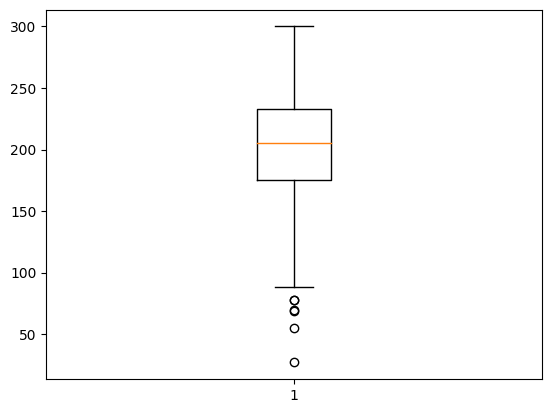

In [ ]:
plt.boxplot(df["total score"], notch=None, vert=None, patch_artist=None, widths=None)

In [ ]:
arr1 = df["total score"]
q1 = np.quantile(arr1, 0.25)

# finding the 3rd quartile
q3 = np.quantile(arr1, 0.75)
med = np.median(arr1)

# finding the iqr region
iqr = q3-q1

# finding upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
print(iqr, upper_bound, lower_bound)

58.0 320.0 88.0


In [ ]:
lowScorers = df.loc[df['total score'] <= 88]

In [ ]:
dfInitial.iloc[17]

gender                                   female
race/ethnicity                          group B
parental level of education    some high school
lunch                              free/reduced
test preparation course                    none
math score                                   18
reading score                                32
writing score                                28
Name: 17, dtype: object

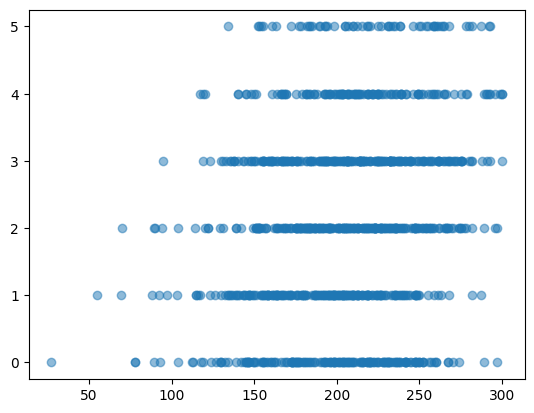

In [ ]:
plt.scatter(df["total score"], df["parental level of education"], alpha=0.5)

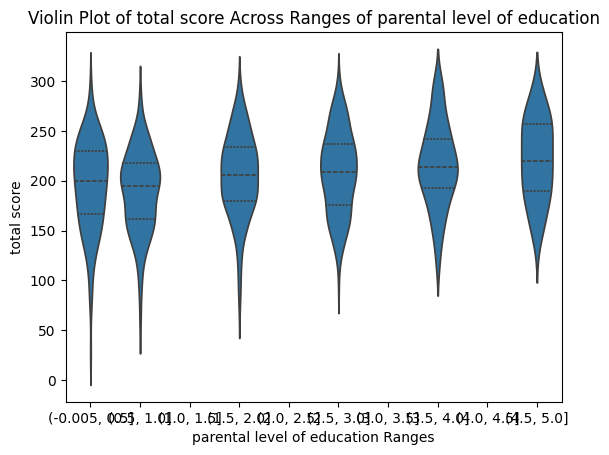

In [ ]:
sns.violinplot(x=pd.cut(df['parental level of education'], bins=10), y=df['total score'], inner='quartile')
plt.title('Violin Plot of total score Across Ranges of parental level of education')
plt.xlabel('parental level of education Ranges')
plt.ylabel('total score')
plt.show()


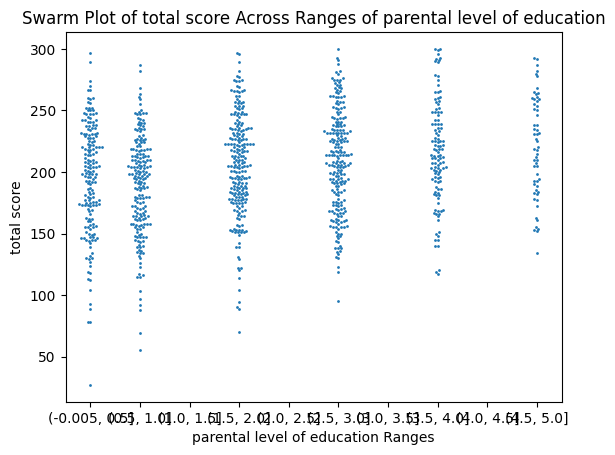

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with columns 'feature1' and 'feature2'
sns.swarmplot(x=pd.cut(df['parental level of education'], bins=10), y=df['total score'], size=2, dodge=True)
plt.title('Swarm Plot of total score Across Ranges of parental level of education')
plt.xlabel('parental level of education Ranges')
plt.ylabel('total score')
plt.show()


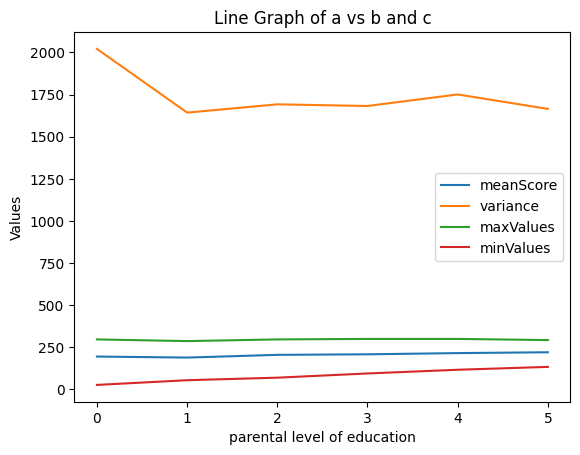

In [ ]:
# plotting total score variance and mean scores against education of parents
meanScore = []
variance = []
maxValues = []
minValues = []

levelEdu = [0, 1, 2, 3, 4, 5]
for i in levelEdu:
  sub_df = df[df['parental level of education'] == i]
  meanScore.append(sub_df['total score'].mean())
  variance.append(sub_df['total score'].var())
  maxValues.append(sub_df['total score'].max())
  minValues.append(sub_df['total score'].min())

plt.plot(levelEdu, meanScore, label='meanScore')
plt.plot(levelEdu, variance, label='variance')
plt.plot(levelEdu, maxValues, label='maxValues')
plt.plot(levelEdu, minValues, label='minValues')

# Adding labels and legend
plt.xlabel('parental level of education')
plt.ylabel('Values')
plt.title('Line Graph of a vs b and c')
plt.legend()

# Show the plot
plt.show()

In [ ]:
# min max normalization
df_norm = (df["total score"] - df["total score"].min()) / (df["total score"].max() - df["total score"].min())
df_norm

0      0.699634
1      0.805861
2      0.919414
3      0.443223
4      0.739927
         ...   
995    0.934066
996    0.531136
997    0.615385
998    0.717949
999    0.813187
Name: total score, Length: 1000, dtype: float64

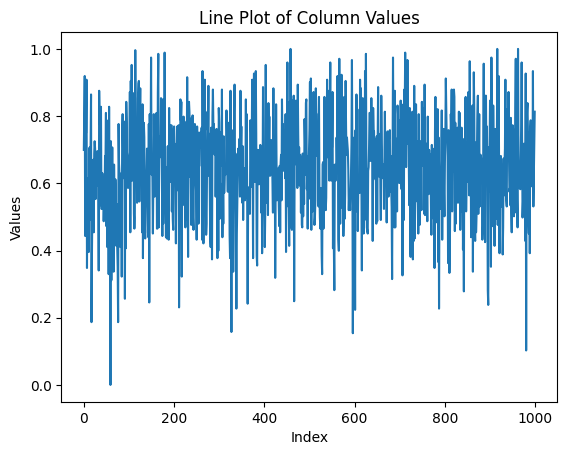

In [ ]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'column_name' is the column you want to plot
plt.plot(df_norm)
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Line Plot of Column Values')
plt.show()


In [ ]:
!pip freeze > requirements.txt
!pip list --format=freeze > requirements.txt

In [ ]:
!python -V

Python 3.10.12
